<a href="https://colab.research.google.com/github/WillowStevens/pod-project/blob/main/HotelDivago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Hotel Divago Analysis

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import the data to *'/content/hotel_data/.hotel_reviews.csv'*
and *'/content/hotel_data/.hotel_info.csv'*

In [ ]:
#Load the data
df_reviews = pd.read_csv('/content/hotel_data/hotel_reviews.csv')
df_hotels = pd.read_csv('/content/hotel_data/hotel_info.csv')

In [ ]:
#Clean the Data
# List of columns to check
columns = ['overall_score', 'price_score', 'location_score', 'cleanliness_score',
           'staff_score', 'communication_score', 'food_score']

# Dictionary to store the count of removed values
removed_counts = {}
initial_count = len(df_reviews)

#remove nulls and duplicates
df_reviews = df_reviews.drop_duplicates()
removed_dupes = initial_count - len(df_reviews)
initial_count = len(df_reviews)
df_reviews = df_reviews.dropna()
removed_null = initial_count - len(df_reviews)
print(f"Removed Duplicates: {removed_dupes}")
print(f"Removed Nulls: {removed_null}")
print(f"Total: {removed_dupes + removed_null}")

# Iterate over the columns
for column in columns:
    # Count the out-of-range values
    out_of_range_count = ((df_reviews[column] < 0) | (df_reviews[column] > 10)).sum()

    # Store the count in the dictionary
    removed_counts[column] = out_of_range_count

    # Replace out-of-range values with NaN
    df_reviews[column] = df_reviews[column].where((df_reviews[column] >= 0) & (df_reviews[column] <= 10))

print("Number of out of range values:")
for column, count in removed_counts.items():
    print(f"{column}: {count}")
df_reviews = df_reviews.dropna()

Removed Duplicates: 385
Removed Nulls: 121
Total: 506
Number of out of range values:
overall_score: 0
price_score: 0
location_score: 0
cleanliness_score: 92
staff_score: 82
communication_score: 0
food_score: 0


In [ ]:
#merge the datasets
df = pd.merge(df_reviews, df_hotels, left_on='hotel', right_on='ID')

In [ ]:
#select relevant columns
df_scores = df[['overall_score', 'price_score', 'location_score','cleanliness_score','staff_score','communication_score','food_score']]

In [ ]:
#calculate the correlation matrix
correlation_matrix = df_scores.corr()

### Neighborhood Analysis

In this section, we explore the average scores for hotels across different neighborhoods in Manhattan. By analyzing these scores, we can identify which areas are performing well in various aspects like cleanliness, staff service, communication, and food quality. This analysis helps hotel managers understand where improvements can be made and how neighborhood factors influence customer satisfaction.


In [180]:
# Grouping data by neighborhood and calculating the mean scores
neighborhood_summary = df.groupby('hotel_neighborhood')[['overall_score', 'price_score','location_score', 'cleanliness_score', 'staff_score', 'communication_score', 'food_score']].mean().reset_index()

# Display the summary table
neighborhood_summary

,hotel_neighborhood,overall_score,price_score,location_score,cleanliness_score,staff_score,communication_score,food_score
0,Chelsea,5.897727,5.863636,5.454545,4.977273,6.636364,7.000000,7.909091
1,Civic Center,6.307692,6.269231,4.557692,8.250000,2.846154,7.038462,7.365385
2,East Harlem,5.720930,5.325581,1.802326,7.581395,6.930233,7.970930,5.511628
3,East Village,7.177398,6.755585,7.285151,7.846255,6.822602,6.804205,6.997372
4,Financial District,7.122642,6.683962,7.867925,7.141509,8.188679,7.820755,5.528302
5,Gramercy,6.372093,6.209302,5.465116,6.697674,7.534884,5.046512,8.186047
6,Greenwich Village,6.832080,6.401003,7.273183,7.095238,5.917293,7.531328,6.832080
7,Harlem,6.241758,6.119658,3.523810,7.452991,7.174603,6.681319,6.948718
8,Hell's Kitchen,7.159184,6.697959,6.616327,8.338776,6.502041,6.032653,7.746939
9,Inwood,5.954225,5.820423,1.665493,7.538732,7.422535,7.186620,7.302817


from matplotlib import pyplot as plt
neighborhood_summary['overall_score'].plot(kind='hist', bins=20, title='overall_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
neighborhood_summary['price_score'].plot(kind='hist', bins=20, title='price_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
neighborhood_summary['location_score'].plot(kind='hist', bins=20, title='location_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
neighborhood_summary['cleanliness_score'].plot(kind='hist', bins=20, title='cleanliness_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
neighborhood_summary.plot(kind='scatter', x='overall_score', y='price_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
neighborhood_summary.plot(kind='scatter', x='price_score', y='location_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
neighborhood_summary.plot(kind='scatter', x='location_score', y='cleanliness_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
neighborhood_summary.plot(kind='scatter', x='cleanliness_score', y='staff_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
neighborhood_summary['overall_score'].plot(kind='line', figsize=(8, 4), title='overall_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
neighborhood_summary['price_score'].plot(kind='line', figsize=(8, 4), title='price_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
neighborhood_summary['location_score'].plot(kind='line', figsize=(8, 4), title='location_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
neighborhood_summary['cleanliness_score'].plot(kind='line', figsize=(8, 4), title='cleanliness_score')
plt.gca().spines[['top', 'right']].set_visible(False)

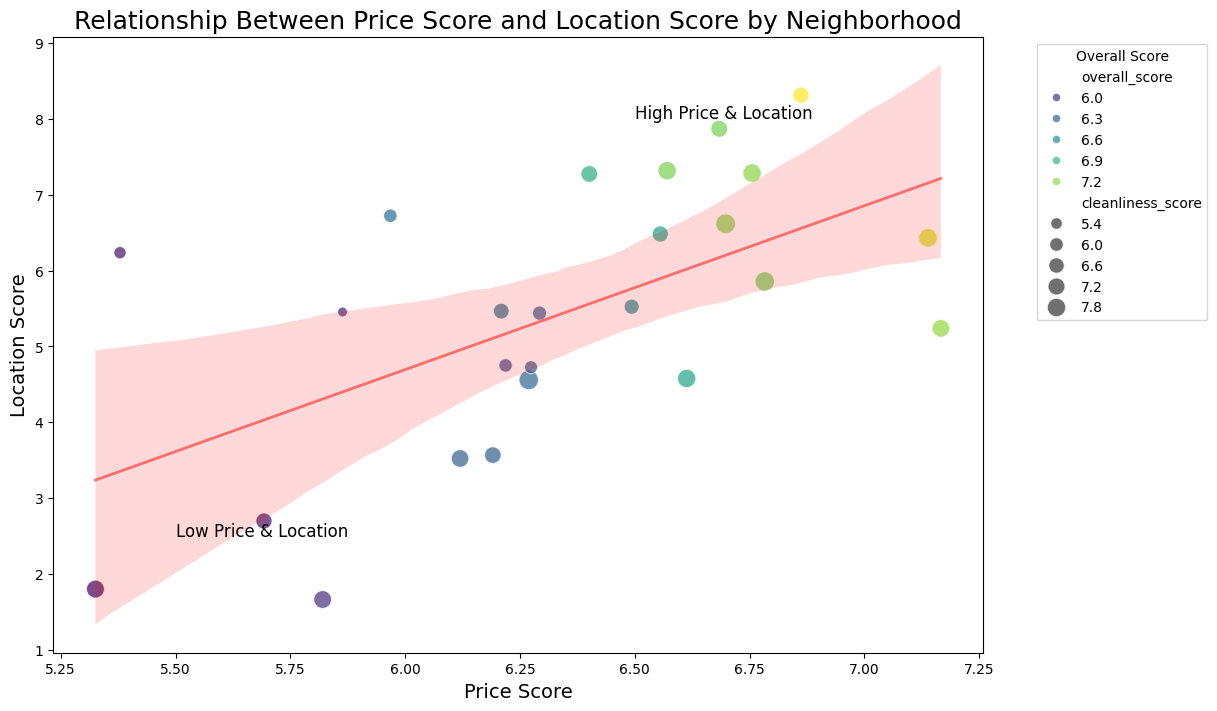

In [183]:
# Set up the figure size
plt.figure(figsize=(12, 8))

# Create a scatter plot with color representing overall score and size representing cleanliness score
sns.scatterplot(
    x='price_score',
    y='location_score',
    data=neighborhood_summary,
    hue='overall_score',
    size='cleanliness_score',
    sizes=(50, 200),
    palette='viridis',
    alpha=0.7
)

# Add a regression line to show the overall trend
sns.regplot(
    x='price_score',
    y='location_score',
    data=neighborhood_summary,
    scatter=False,
    color='red',
    line_kws={"alpha":0.5, "lw":2}
)

# Annotate specific points of interest
plt.text(6.5, 8, 'High Price & Location', fontsize=12, color='black')
plt.text(5.5, 2.5, 'Low Price & Location', fontsize=12, color='black')

# Add titles and labels
plt.title('Relationship Between Price Score and Location Score by Neighborhood', fontsize=18)
plt.xlabel('Price Score', fontsize=14)
plt.ylabel('Location Score', fontsize=14)

# Move the legend out of the way
plt.legend(title='Overall Score', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

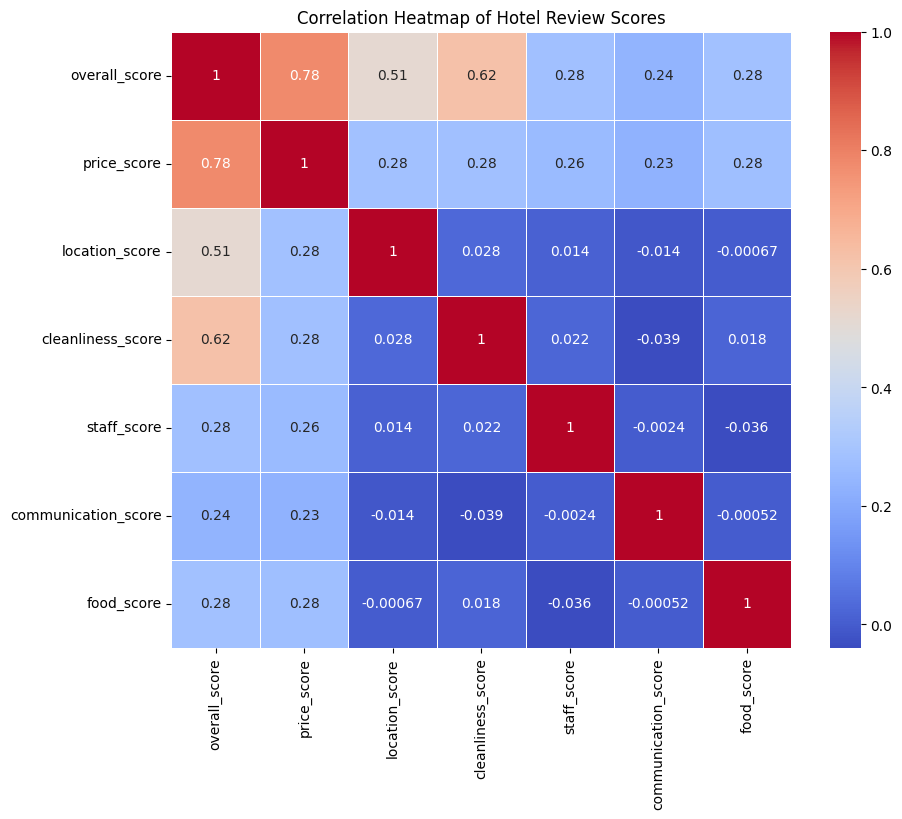

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,cmap ='coolwarm',linewidths=0.7)
plt.title('Correlation Heatmap of Hotel Review Scores')
plt.show()

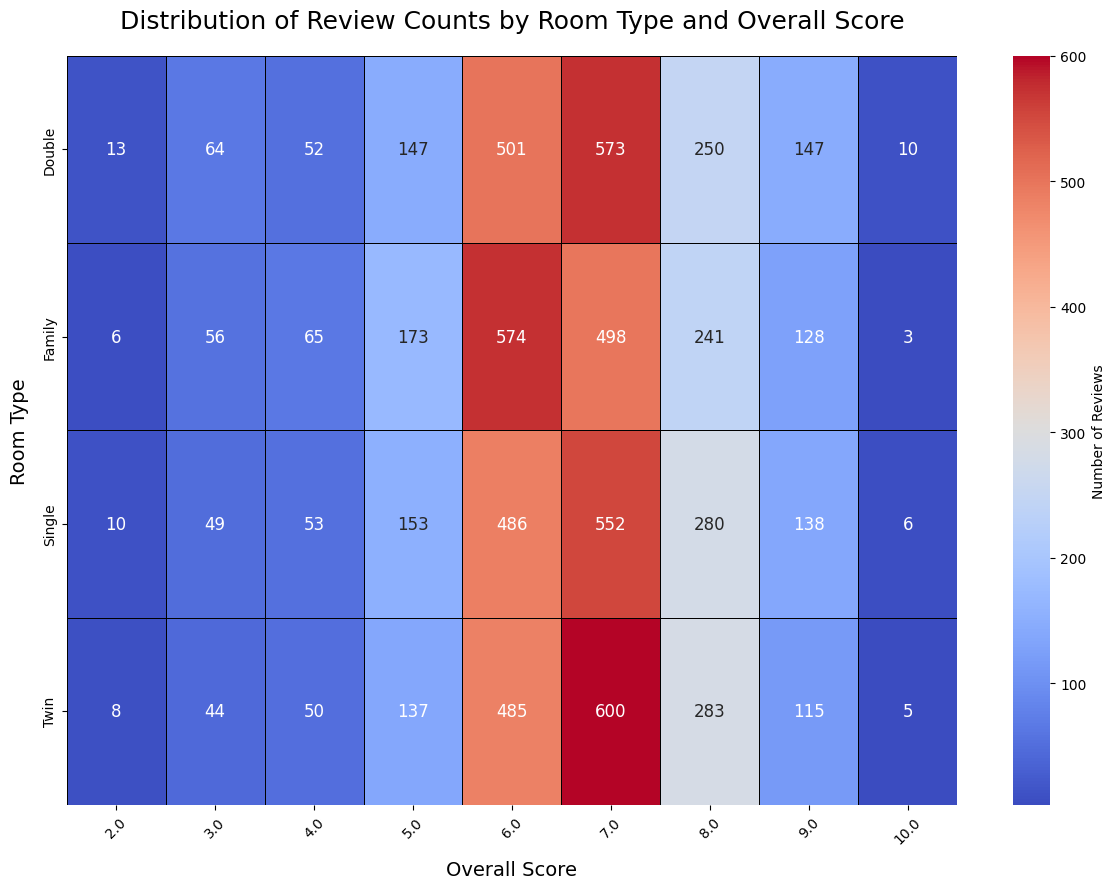

In [184]:
review_counts = pd.crosstab(df['room_type'], df['overall_score'])

plt.figure(figsize=(12, 9))

# Use a more contrasting color palette for better visibility
sns.heatmap(
    review_counts,
    annot=True,
    fmt='d',
    cmap='coolwarm',
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Number of Reviews'},
    annot_kws={"size": 12}
)

# Add more descriptive titles and labels
plt.title('Distribution of Review Counts by Room Type and Overall Score', fontsize=18, pad=20)
plt.xlabel('Overall Score', fontsize=14, labelpad=10)
plt.ylabel('Room Type', fontsize=14, labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

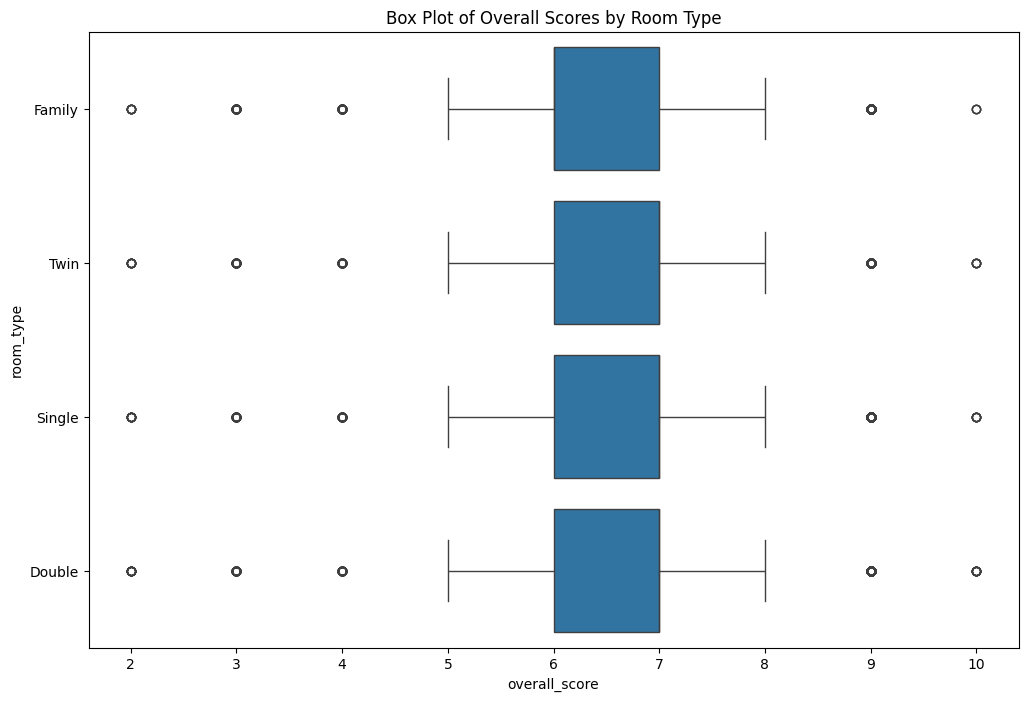

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='overall_score', y='room_type', data=df)
plt.title('Box Plot of Overall Scores by Room Type')
plt.show()

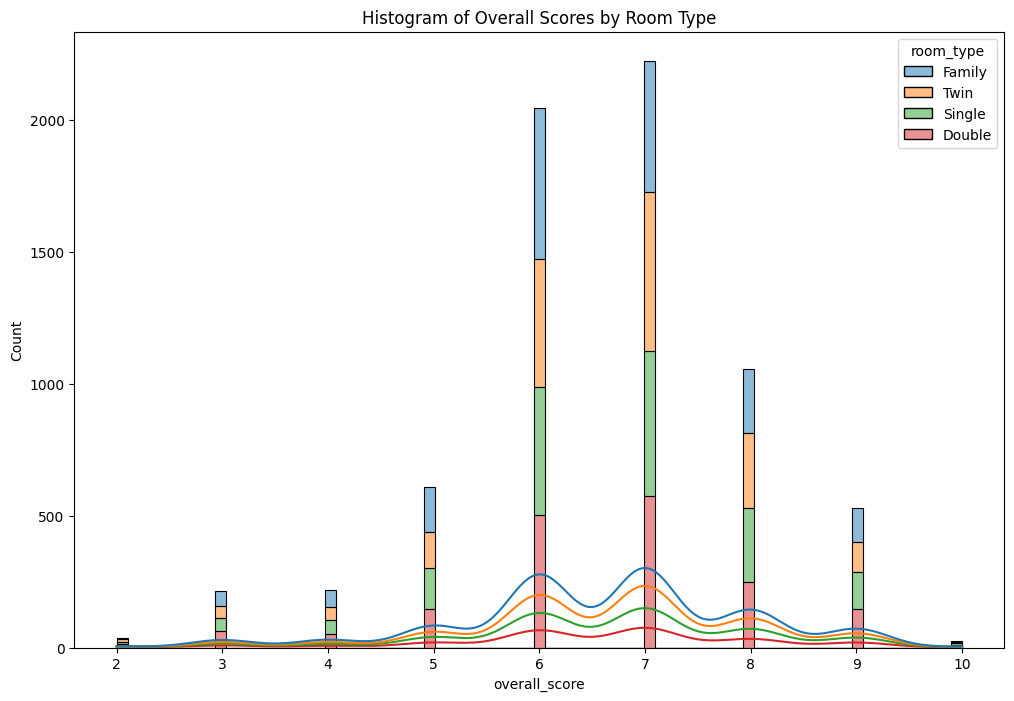

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='overall_score', hue='room_type', multiple='stack', kde=True)
plt.title('Histogram of Overall Scores by Room Type')
plt.show()

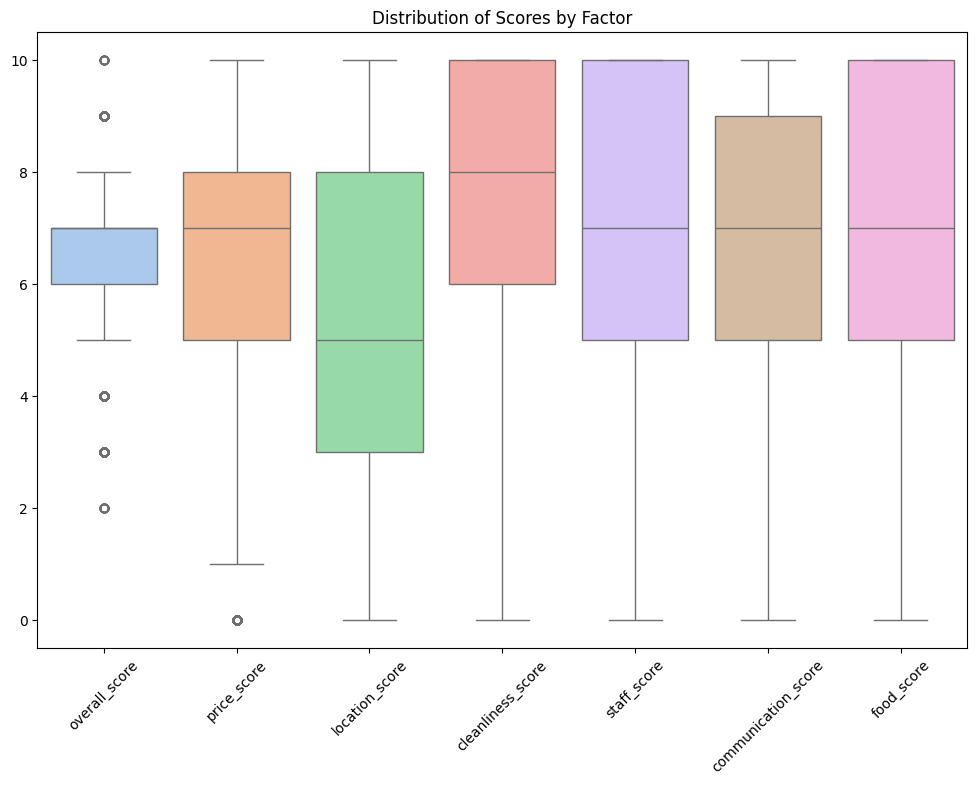

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_scores, palette='pastel')
plt.title('Distribution of Scores by Factor')
plt.xticks(rotation=45)
plt.show()

<ipython-input-86-4665d434062a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index,


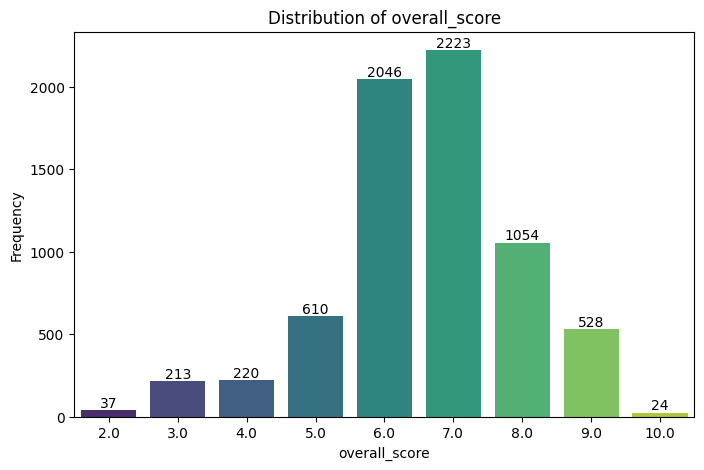

<ipython-input-86-4665d434062a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index,


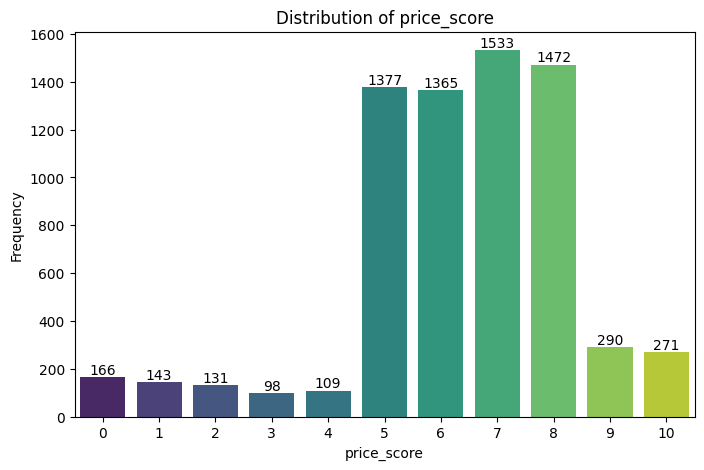

<ipython-input-86-4665d434062a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index,


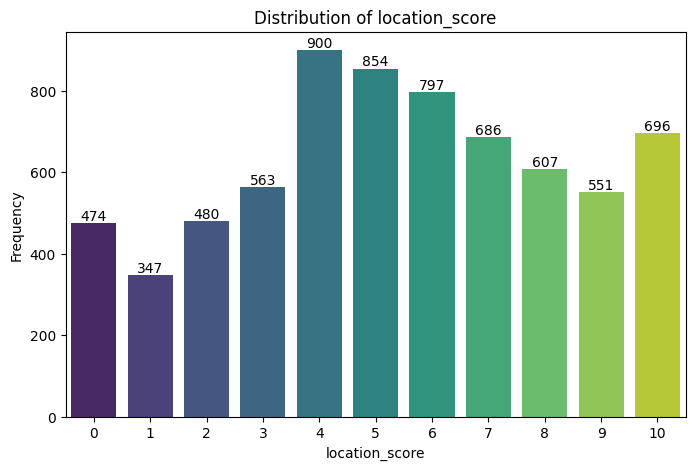

<ipython-input-86-4665d434062a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index,


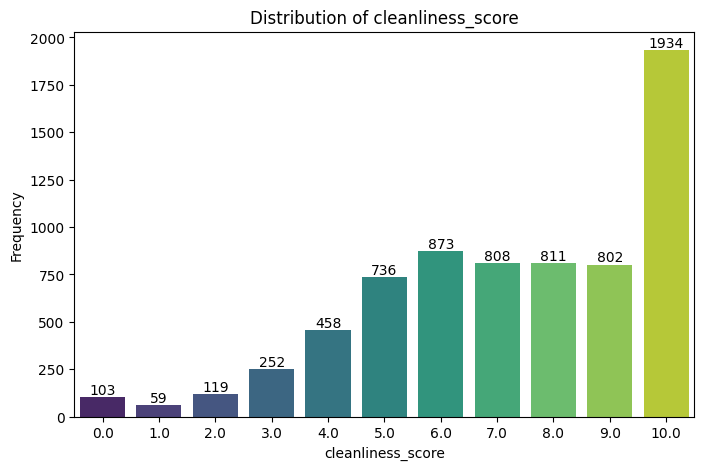

<ipython-input-86-4665d434062a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index,


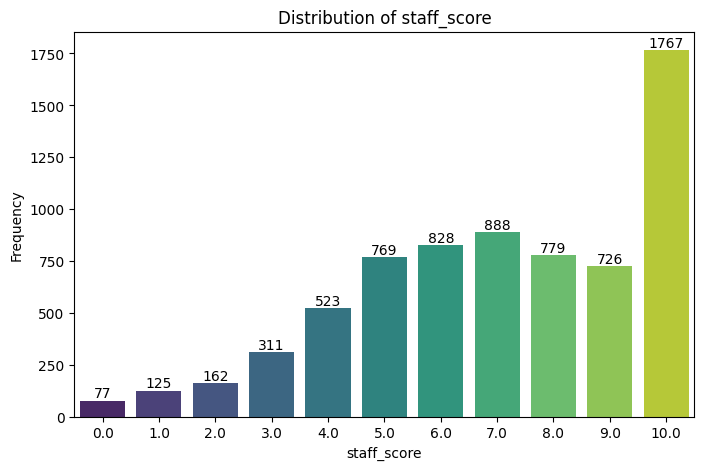

<ipython-input-86-4665d434062a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index,


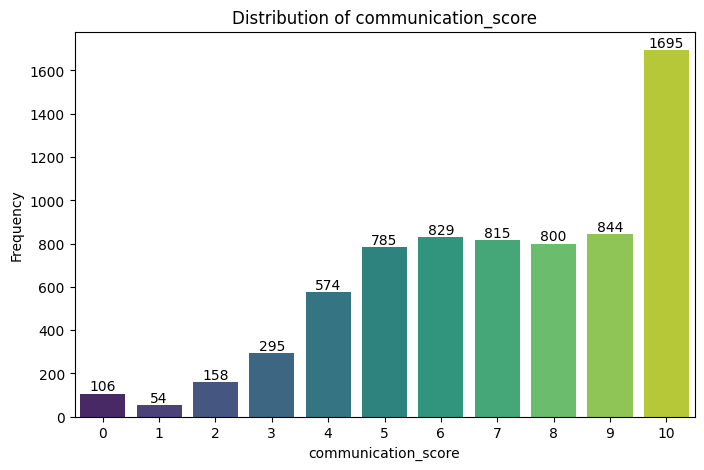

<ipython-input-86-4665d434062a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index,


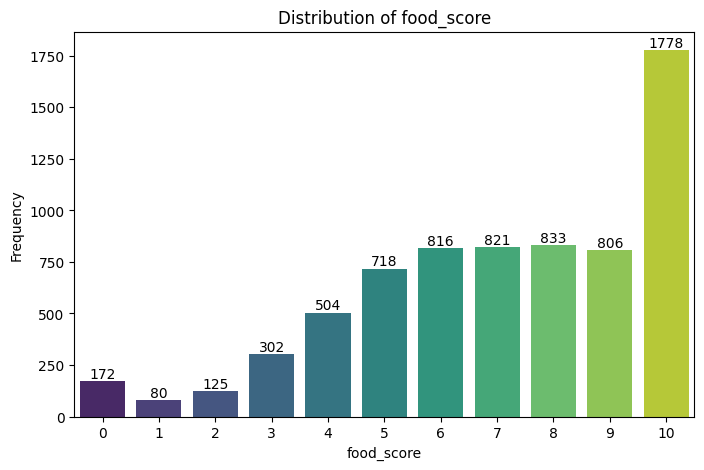

In [ ]:
for column in columns:
    plt.figure(figsize=(8, 5))

    # Get the value counts sorted by index to ensure alignment with barplot
    value_counts = df[column].value_counts().sort_index()

    # Create the bar plot with sorted index
    sns.barplot(x=value_counts.index,
                y=value_counts.values,
                palette="viridis")

    # Add the text annotations on top of the bars
    for index, value in enumerate(value_counts.values):
        plt.text(index, value, str(value), ha='center', va='bottom')

    # Set the title and labels
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')

    # Display the plot
    plt.show()

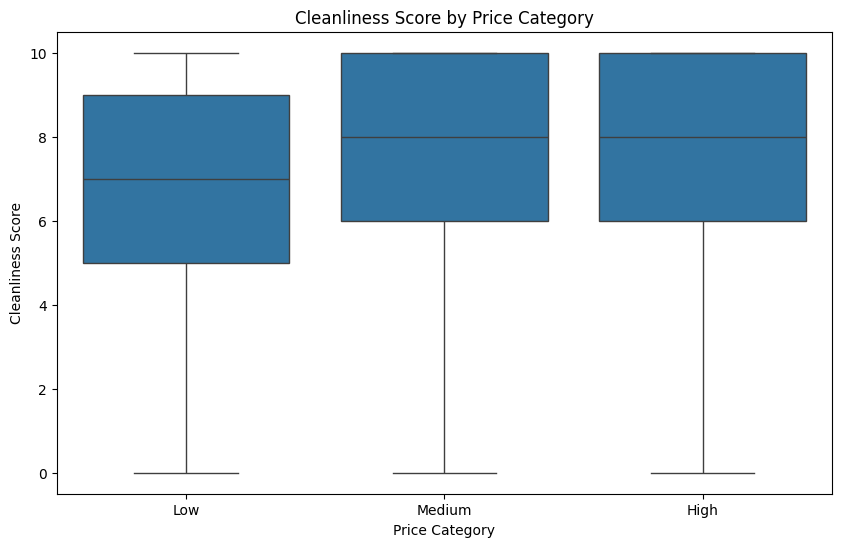

In [ ]:
df['price_category'] = pd.qcut(df['price_score'], q=3, labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_category', y='cleanliness_score', data=df)
plt.title('Cleanliness Score by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Cleanliness Score')
plt.show()

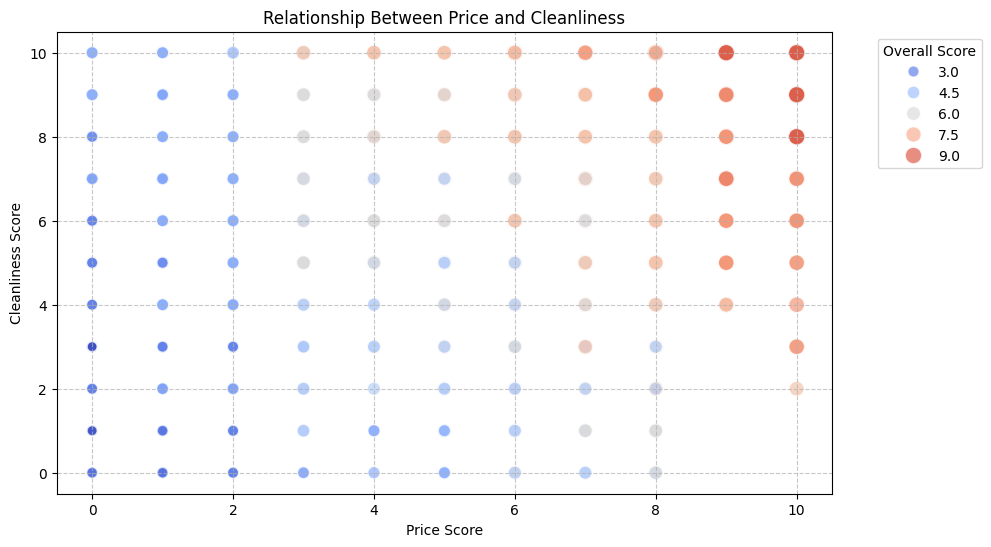

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_score', y='cleanliness_score', data=df, hue='overall_score', palette='coolwarm', size='overall_score', sizes=(50, 150), alpha=0.7)
plt.title('Relationship Between Price and Cleanliness')
plt.xlabel('Price Score')
plt.ylabel('Cleanliness Score')
plt.legend(title='Overall Score', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<ipython-input-139-aed9ecf40d7f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='staff_score', y='cleanliness_score', data=grouped, palette='viridis')


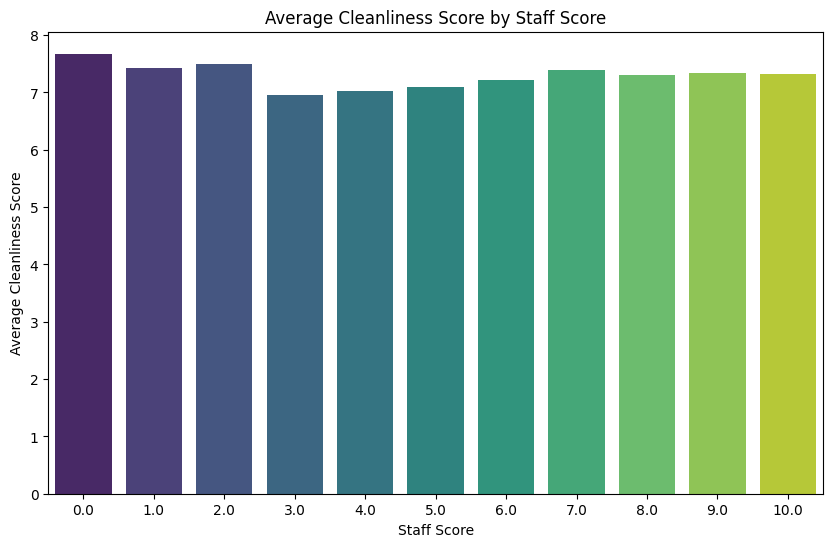

In [ ]:
grouped = df.groupby('staff_score')['cleanliness_score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='staff_score', y='cleanliness_score', data=grouped, palette='viridis')
plt.title('Average Cleanliness Score by Staff Score')
plt.xlabel('Staff Score')
plt.ylabel('Average Cleanliness Score')
plt.show()